# Web Book Bayesian Inference


# Chapter 7: Predictive Distributions

# Part 1

Do people prefer to use the word “data” as singular or plural?

$ \theta $ is the proportion of people who think "data" is a singular word




| $\theta$    | Prior Probability | Weighted $\theta$ = Prior Prob $\times \theta$ | Prior Prob $\times \theta^2$ |
| -------- | ------- | ------- | ------- |
| 0.1  | 0.01    | 0.001    | 0.0001    |
| 0.3 | 0.05     | 0.015     | 0.0045     |
| 0.5    | 0.15    | 0.045    | 0.0375    |
| 0.7    | 0.30    | 0.21    | 0.147    |
| 0.9    | 0.49    | 0.441    | 0.3969    |
|        |     | $E(\theta) = 0.742$    | $E(\theta^2) = 0.586$  |

$ \textbf{Prior Predictive Probability} = 0.742 $, 
and 
$ \sigma(\theta) = 0.281$

Not sure if the $\sigma$ above means much... we have our prior distribution above which has a lot more information.  We lose information in characterising the distribution with two values ($\mu, \sigma$) because we must then impose some distribution on the prior e.g. Normal.

Text(0.5, 0, 'Theta')

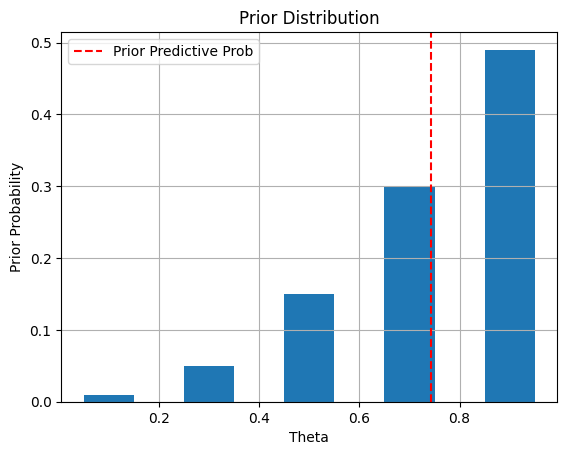

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

thetas = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
prior_probs = np.array([0.01, 0.05, 0.15, 0.30, 0.49])

weighted_avg = np.sum(thetas * prior_probs)

fig, ax = plt.subplots(1)
ax.grid(True)
ax.bar(thetas, prior_probs, width=0.1)
ax.axvline(weighted_avg, color='red', ls='--', label='Prior Predictive Prob')
ax.legend()
ax.set_title("Prior Distribution")
ax.set_ylabel("Prior Probability")
ax.set_xlabel("Theta")




35 students take part in a survey.  Simulate distributions for each of the prior values (0.1, 0.3, 0.5, 0.7, 0.9) that $Y$ students believe that "data" is a singular noun.

$Y_i \sim \text{binomial}(n=35, p=p_i)$ , where $i \in $ `range(len(priors))`

The Prior Predictive Probability that Y >= 34 students is 0.0600


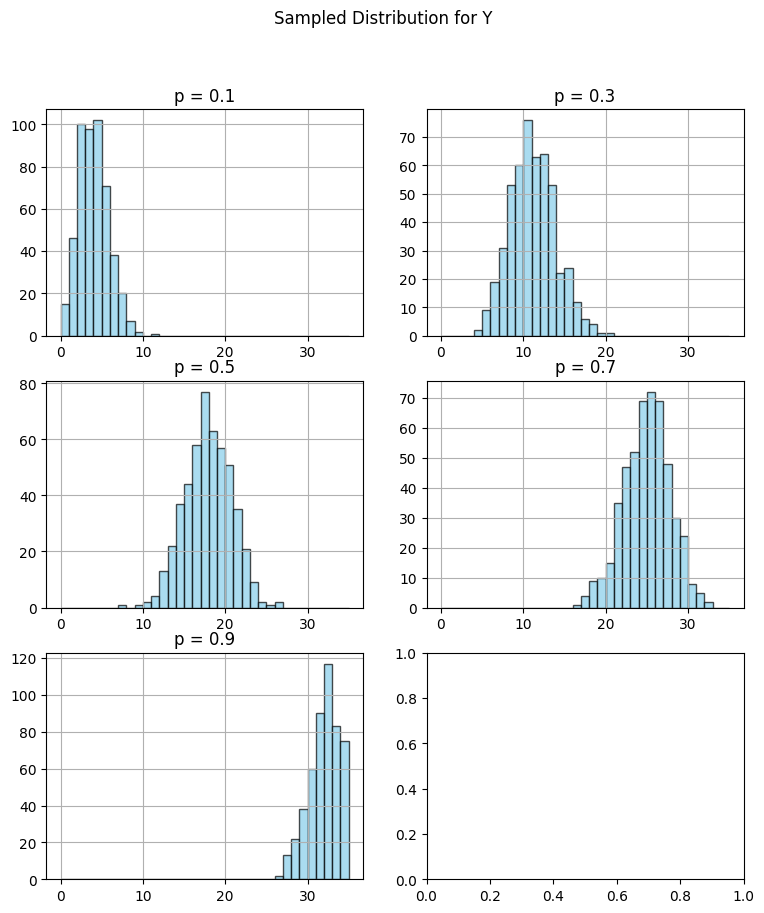

In [3]:
n = 35
sample_size = 500 

fig, axs = plt.subplots(3, 2, figsize=(9, 10))
plt.suptitle("Sampled Distribution for Y")
for i, ax in enumerate(axs.flatten()[0:5]):
    p = thetas[i]
    ax.grid(True)
    ax.set_title('p = {}'.format(p))
    samples = np.random.binomial(n, p, size=sample_size)
    ax.hist(samples, bins=range(n+1), color='skyblue', edgecolor='black', alpha=0.7)


# Prior Predictive Probability that at least 34 out of 35 students believe "data" is a singular noun
prior_predictive_prob = 0

for prior_prob, theta in zip(prior_probs, thetas):
    successful_sample = 1 - sp.stats.binom.cdf(33, n, theta)
    prior_predictive_prob += successful_sample * prior_prob

print("The Prior Predictive Probability that Y >= 34 students is {:.4f}".format(prior_predictive_prob))


## For the remaining parts, suppose that 31 students in a sample of 35 Cal Poly statistics students prefer data as singular.

`The problem here is normalising the likelihood!! We need to make is so that posterior sums to 1, by dividing by unconditional p(data)`

I have solved this by normalising the posteriors

The Posterior Predictive Probability that Y >= 34 students is 0.5996


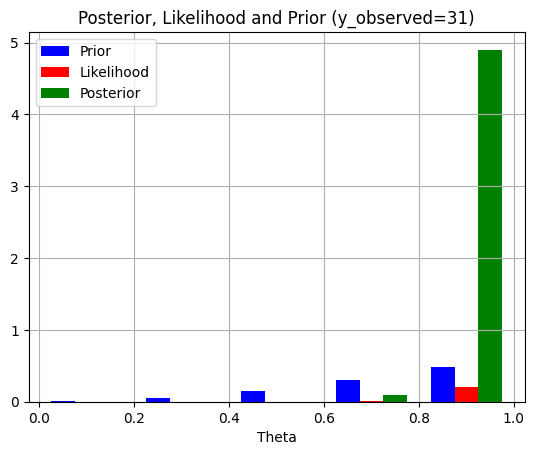

In [4]:
# Posterior = Likelihood * Prior 
y_observed = 31

likelihoods = np.full_like(thetas, np.nan)

for i, theta in enumerate(thetas):
    likelihoods[i] = sp.stats.binom.pmf(y_observed, n, theta) 

posteriors = likelihoods * prior_probs

# Normalise the posterior distribution (since we haven't divided by the marginalised distribution)
norm_factor = np.cumsum(posteriors)[-1] / len(posteriors)
posteriors = posteriors / norm_factor

fig, ax = plt.subplots(1)
ax.grid(True)
width = 0.05
ax.bar(thetas - width, prior_probs, width, color='blue', label='Prior')
ax.bar(thetas, likelihoods, width, color='red', label='Likelihood')
ax.bar(thetas + width, posteriors, width, color='green', label='Posterior')
ax.legend()
ax.set_title("Posterior, Likelihood and Prior (y_observed=31)")
ax.set_xlabel("Theta")

# Posterior Predictive Probability that at least 34 out of 35 students think "data" is a singular noun

posterior_predictive_prob = 0

for posterior, theta in zip(posteriors, thetas):
    successful_sample = 1 - sp.stats.binom.cdf(33, n, theta)
    posterior_predictive_prob += successful_sample * posterior

print("The Posterior Predictive Probability that Y >= 34 students is {:.4f}".format(posterior_predictive_prob))




# Part 2

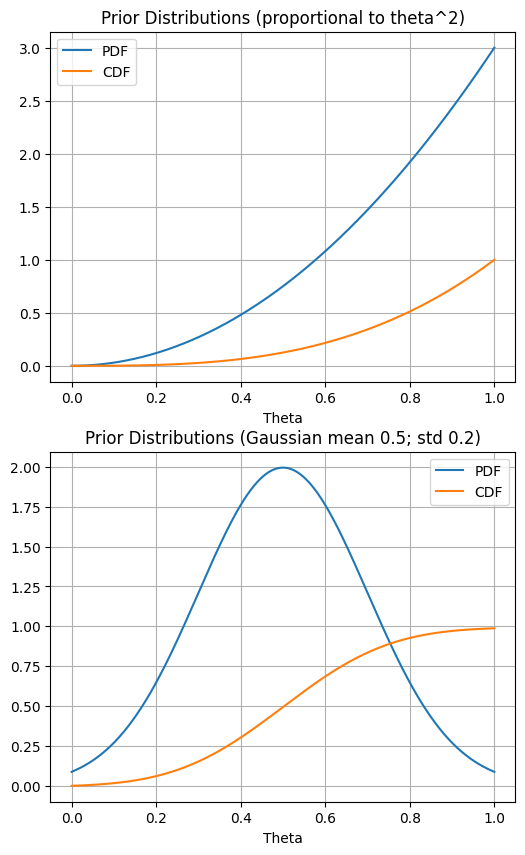

In [5]:
thetas = np.linspace(0, 1, 10001)

# Let my prior be a gaussian centered on 0.5 with standard deviation 0.2

mu = 0.5
sigma = 0.2

gauss_priors = sp.stats.norm.pdf(thetas, mu, sigma)


# Now assume the prior distribution is proportional to theta^2

priors = 3 * thetas**2 

fig, axs = plt.subplots(2, figsize=(6,10))
axs[0].set_xlabel('Theta')
axs[0].set_title('Prior Distributions (proportional to theta^2)')
axs[0].grid(True)
axs[0].plot(thetas, priors, label = 'PDF')
axs[0].plot(thetas, np.cumsum(priors) / len(priors), label = 'CDF')
axs[0].legend()
axs[1].set_xlabel('Theta')
axs[1].set_title('Prior Distributions (Gaussian mean 0.5; std 0.2)')
axs[1].grid(True)
axs[1].plot(thetas, gauss_priors, label = 'PDF')
axs[1].plot(thetas, np.cumsum(gauss_priors) / len(gauss_priors), label = 'CDF')
axs[1].legend()


# Prior Predictive Distribution

Say we have our prior $p(\theta)$. We want to work out a predictive distribution, weighted by the priors.

$$ p(Evidence | \theta) \sim \text{Binomial}(n=35, p=\theta) $$

$$ p(Evidence) = \Sigma_\theta \left\{p(Evidence | \theta) \times p(\theta)\right\}$$

`Is this correct? Let's write it down below...`

### Quadratic Prior

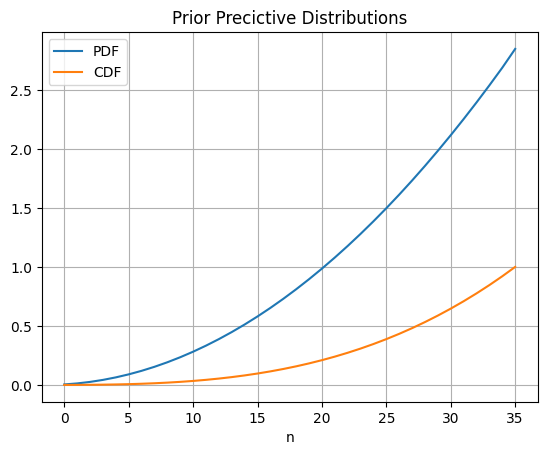

In [6]:
# Prior Predictive Distribution using the theta^2 distribution
n = 35
prior_predictive_dist = np.full(n+1, 0.0)

for prior, theta in zip(priors, thetas):
    theta_dist = sp.stats.binom.pmf(np.arange(0, n+1, 1), n, theta)
    prior_predictive_dist += theta_dist * prior

# Normalise prior_predictive_dist
prior_predictive_dist /= np.cumsum(prior_predictive_dist)[-1] / len(prior_predictive_dist)

fig, ax = plt.subplots(1)
ax.set_xlabel('n')
ax.set_title('Prior Precictive Distributions')
ax.grid(True)
ax.plot(np.arange(0, n+1, 1), prior_predictive_dist, label = 'PDF')
ax.plot(np.arange(0, n+1, 1), np.cumsum(prior_predictive_dist) / len(prior_predictive_dist), label = 'CDF')
ax.legend()

### Gaussian Prior

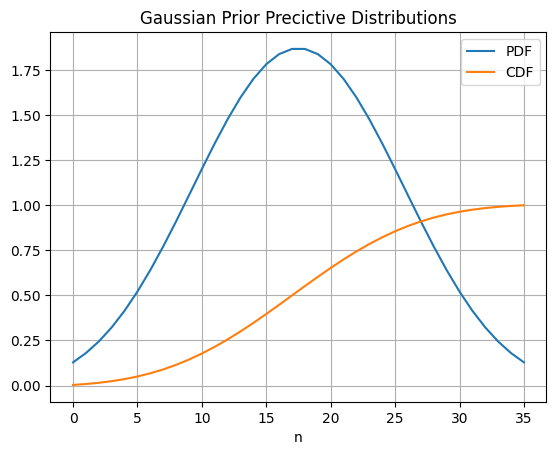

In [7]:
n = 35
gauss_prior_predictive_dist = np.full(n+1, 0.0)


for prior, theta in zip(gauss_priors, thetas):
    theta_dist = sp.stats.binom.pmf(np.arange(0, n+1, 1), n, theta)
    gauss_prior_predictive_dist += theta_dist * prior

# Normalise prior_predictive_dist
gauss_prior_predictive_dist /= np.cumsum(gauss_prior_predictive_dist)[-1] / len(gauss_prior_predictive_dist)

fig, ax = plt.subplots(1)
ax.set_xlabel('n')
ax.set_title('Gaussian Prior Precictive Distributions')
ax.grid(True)
ax.plot(np.arange(0, n+1, 1), gauss_prior_predictive_dist, label = 'PDF')
ax.plot(np.arange(0, n+1, 1), np.cumsum(gauss_prior_predictive_dist) / len(gauss_prior_predictive_dist), label = 'CDF')
ax.legend()

# Posterior Distribution

Find the posterior distribution over $\theta$ by calculating the likelihood (y_observed = 31 out of 25 trials) and multiplying into the prior.

### Quadratic Prior

In [8]:
# Choose what happened in the test out of 35 candidates

y_observed = 31

Text(0.5, 0, 'Theta')

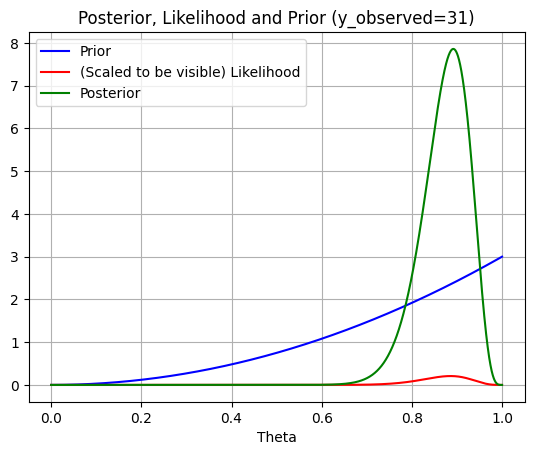

In [9]:
# Posterior = Likelihood * Prior 

likelihoods = np.full_like(thetas, np.nan)

for i, theta in enumerate(thetas):
    likelihoods[i] = sp.stats.binom.pmf(y_observed, n, theta) 

posteriors = likelihoods * priors

# Normalise the posterior distribution (since we haven't divided by the marginalised distribution)
norm_factor = np.cumsum(posteriors)[-1] / len(posteriors)
posteriors = posteriors / norm_factor

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, priors, color='blue', label='Prior')
ax.plot(thetas, likelihoods, color='red', label='(Scaled to be visible) Likelihood')
ax.plot(thetas, posteriors, color='green', label='Posterior')
ax.legend()
ax.set_title("Posterior, Likelihood and Prior (y_observed={})".format(y_observed))
ax.set_xlabel("Theta")



### Gaussian Prior

Text(0.5, 0, 'Theta')

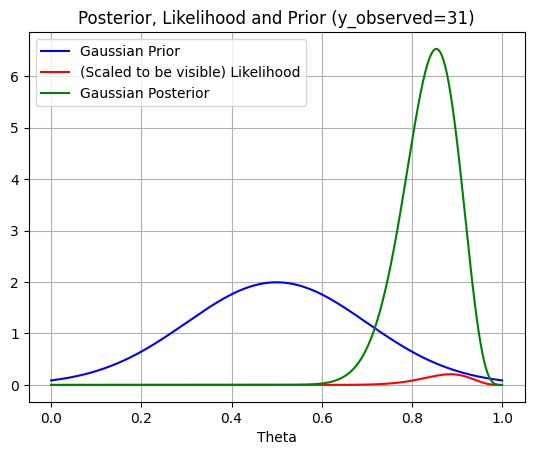

In [10]:
# Posterior = Likelihood * Prior 

likelihoods = np.full_like(thetas, np.nan)

for i, theta in enumerate(thetas):
    likelihoods[i] = sp.stats.binom.pmf(y_observed, n, theta) 

gauss_posteriors = likelihoods * gauss_priors

# Normalise the posterior distribution (since we haven't divided by the marginalised distribution)
norm_factor = np.cumsum(gauss_posteriors)[-1] / len(gauss_posteriors)
gauss_posteriors = gauss_posteriors / norm_factor

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, gauss_priors, color='blue', label='Gaussian Prior')
ax.plot(thetas, likelihoods, color='red', label='(Scaled to be visible) Likelihood')
ax.plot(thetas, gauss_posteriors, color='green', label='Gaussian Posterior')
ax.legend()
ax.set_title("Posterior, Likelihood and Prior (y_observed={})".format(y_observed))
ax.set_xlabel("Theta")



## Comparison of Priors

Text(0.5, 0, 'Theta')

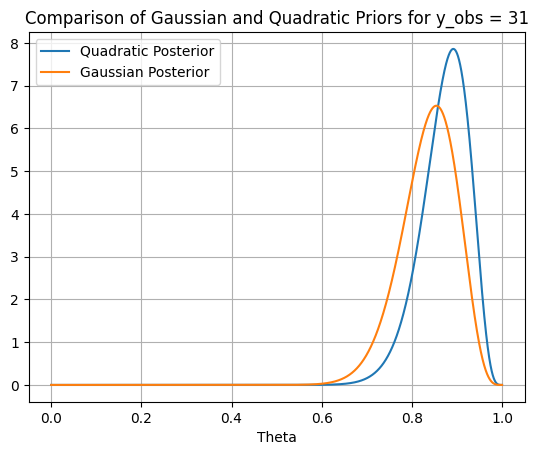

In [11]:
fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, posteriors, label='Quadratic Posterior')
ax.plot(thetas, gauss_posteriors, label='Gaussian Posterior')
ax.legend()
ax.set_title("Comparison of Gaussian and Quadratic Priors for y_obs = {}".format(y_observed))
ax.set_xlabel("Theta")


## Questions Chapter 7

1. What distribution follows from a given prior distribution? E.g. if prior is Gaussian --> posterior is Gaussian.  What about Uniform, Quadratic, Exponential, Beta, Gamma
2. How do we select our priors? 
3. Normalisation of Posterior --> always done by enforcing integral of PDF is 1? 

# Chapter 8: Introduction to Beta Distribution

$f_\beta(u | \alpha, \beta) = u^{\alpha - 1}(1-u)^{\beta - 1}$, $0 < u < 1$

$$ EV = \frac{\alpha}{\alpha + \beta} $$
$$ Var = \frac{(\frac{\alpha}{\alpha + \beta})(1 - \frac{\alpha}{\alpha + \beta})}{\alpha + \beta + 1} $$


Text(0.5, 0, 'u')

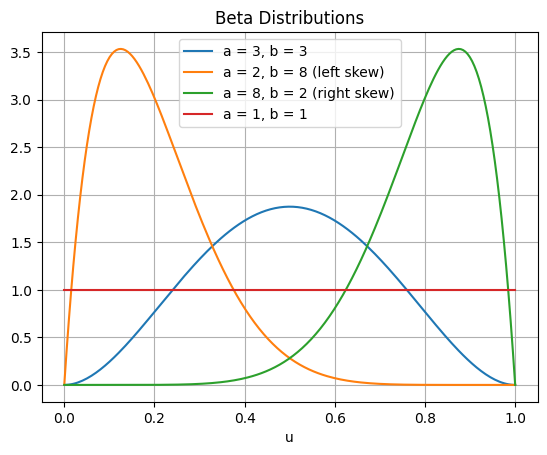

In [38]:
u = np.linspace(0,1,200)


fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(u, sp.stats.beta.pdf(u, 3, 3), label='a = 3, b = 3')
ax.plot(u, sp.stats.beta.pdf(u, 2, 8), label='a = 2, b = 8 (left skew)')
ax.plot(u, sp.stats.beta.pdf(u, 8, 2), label='a = 8, b = 2 (right skew)')
ax.plot(u, sp.stats.beta.pdf(u, 1, 1), label='a = 1, b = 1')
ax.legend()
ax.set_title("Beta Distributions")
ax.set_xlabel("u")


## Exercise: Calculate the Posterior Distributions for some Beta Distributions
Using the same example as Chapter 7 - 31 out of 35 students believe that 'data' is a singular noun.


Text(0.5, 0, 'theta')

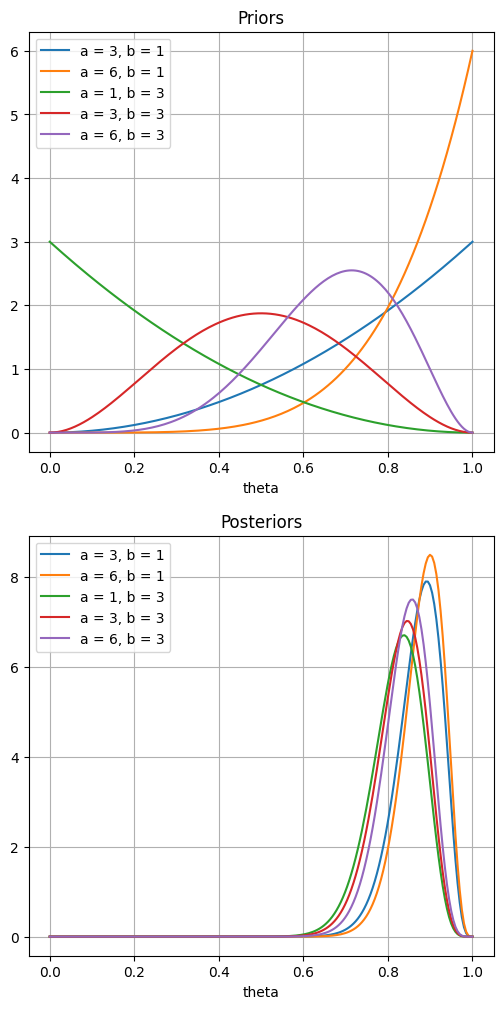

In [46]:
thetas = np.linspace(0,1,200)

# Data 
y_observed = 31
n = 35

# Arrays of prior parameter choices
alpha = np.array([3, 6, 1, 3, 6])
beta = np.array([1, 1, 3, 3, 3])

# Calculate Likelihoods for each theta value
likelihoods = np.full_like(thetas, np.nan)
for i, theta in enumerate(thetas):
    likelihoods[i] = sp.stats.binom.pmf(y_observed, n, theta) 


# Plot Priors and Posteriors
fig, ax = plt.subplots(2, figsize=(6, 12))
ax[0].grid(True)
ax[1].grid(True)
for alpha, beta in zip(alpha, beta):
    posteriors = likelihoods * sp.stats.beta.pdf(thetas, alpha, beta)
    norm_factor = np.cumsum(posteriors)[-1] / len(posteriors)
    posteriors = posteriors / norm_factor
    ax[0].plot(thetas, sp.stats.beta.pdf(thetas, alpha, beta), label='a = {}, b = {}'.format(alpha, beta))
    ax[1].plot(thetas, posteriors, label='a = {}, b = {}'.format(alpha, beta))
ax[0].legend()
ax[1].legend()
ax[0].set_title("Priors")
ax[0].set_xlabel("theta")
ax[1].set_title("Posteriors")
ax[1].set_xlabel("theta")




## Questions Chapter 8

1. What is the posterior distribution if the prior is a Beta?

![alternative text](./beta_binomial.png)

# Chapter 10: Posterior Simulation and JAGS

Suppose we do a study on the proportion of people who are left handed.  Our prior is a Gaussian with mean 0.15 and standard deviation 0.08.  We must truncate the Gaussian at 0 and 1 as the allowed values lie in this region.  Suppose our study shows that 5 out of 25 individuals are left handed.  What is the posterior distribution in this case?

$$ \text{Prior } \pi(\theta) \propto \exp\left(-\frac{(\theta - 0.15)^2}{2 * 0.08^2}\right) $$

$$ \text{Likelihood } f(y | \theta) \propto \theta^5(1-\theta)^{20} $$

$$ \text{Posterior } \pi(\theta | y) \propto \theta^5(1-\theta)^{20}\exp\left(-\frac{(\theta - 0.15)^2}{2 * 0.08^2}\right) $$

## Digression on distribution type

This is an odd distribution which I am not familiar with... Despite the **prior being a Gaussian and the likelihood being a beta distribution**

`If we had set up a prior with a Beta distribution, our posterior would then also be a Beta distribution?`

$$ \text{Prior } \pi(\theta) \propto \theta^{(\alpha - 1)}(1-\theta)^{(\beta - 1)} $$

$$ \text{Likelihood } f(y | \theta) \propto \theta^5(1-\theta)^{20} $$

$$ \text{Posterior } \pi(\theta | y) \propto \theta^{(5 + \alpha - 1)}(1-\theta)^{(20 +\beta - 1)} = \theta^{(\alpha' - 1)}(1-\theta)^{(\beta' - 1)}$$

`Or similarly if our likelihood happened to be Gaussian, we end up with a Gaussian`

$$ \text{Prior } \pi(\theta) \propto \exp\left(-\frac{(\theta - 0.15)^2}{2 * 0.08^2}\right) $$

$$ \text{Likelihood } f(y | \theta) \propto \exp\left(-\frac{(\theta - \mu)^2}{2 \sigma^2}\right) $$

$$ \text{Posterior } \pi(\theta | y) \propto \exp\left(-\frac{(\theta - \mu)^2}{2 \sigma^2}-\frac{(\theta - 0.15)^2}{2 * 0.08^2}\right) $$

Where the exponent is some quadratic in $\theta$ meaning we can complete the square and obtain a new mean, with a multiplicative factor out the front. The prior std and likelihood std combine in some way when we combine the fractions. (**exercise**)


## Returning to Posterior Simulation

How can we plot the posterior in the first case? We use a grid approximation (allow a continuous parameter to be discretised). Although the code is vectorised, we still need N calculations for every parameter in the distribution.  This scales as $N^\text{number of parameters}$.  In the case below, $N=1000$, and the number of parameters is just 1.

Text(0.5, 0, 'theta')

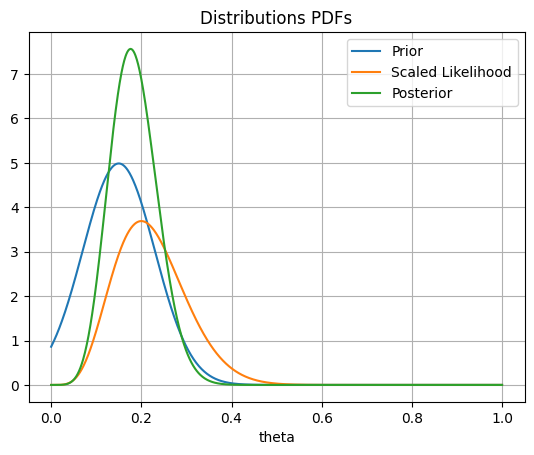

In [87]:
thetas = np.linspace(0, 1, 1001)

priors = sp.stats.norm.pdf(thetas, 0.15, 0.08)

scale_factor = 1000000
likelihoods = thetas**5 * (1 - thetas)**20

posteriors = likelihoods * priors
posteriors = posteriors * len(posteriors) / sum(posteriors)

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, priors, label="Prior")
ax.plot(thetas, scale_factor * likelihoods, label="Scaled Likelihood")
ax.plot(thetas, posteriors, label="Posterior")
ax.legend()
ax.set_title("Distributions PDFs")
ax.set_xlabel("theta")

In a different study, the number of people who kiss with their heads tilted to the right is investigated with the suspicion that more prefer to tilt their heads to the right than to the left. Our prior for the **proportion of people who tilt their head to the right** is the following

| $\theta$    | Prior Probability |
| -------- | ------- |
| 0.1  | 1/9   |
| 0.3 | 2/9     |
| 0.5  | 3/9    |
| 0.7 | 2/9     |
| 0.9  | 1/9    |

The data shows that 8 out of 12 tilt their heads to the right when kissing.

- Suppose it were 800 out of 1200?
- Say we use a Beta prior instead of a discrete prior with only 5 values
- How much does the compute time go up? 

Text(0.5, 0, 'theta')

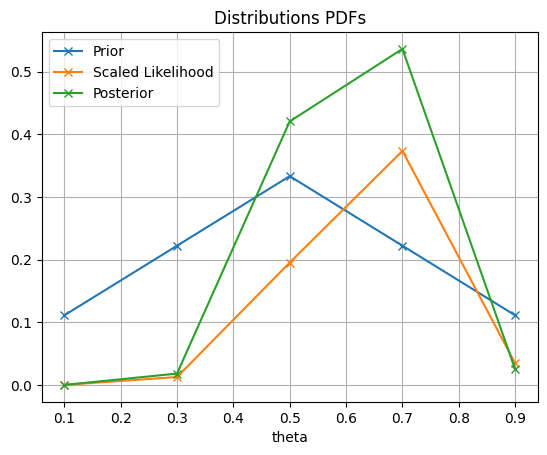

In [85]:
thetas = np.array([0.1, 0.3, 0.5, 0.7, 0.9])

priors = np.array([1/9, 2/9, 3/9, 2/9, 1/9])

scale_factor = 800
likelihoods = thetas**8 * (1 - thetas)**4

posteriors = likelihoods * priors
posteriors = posteriors / sum(posteriors)

fig, ax = plt.subplots(1)
ax.grid(True)
ax.plot(thetas, priors, label="Prior", marker='x')
ax.plot(thetas, scale_factor * likelihoods, label="Scaled Likelihood", marker='x')
ax.plot(thetas, posteriors, label="Posterior", marker='x')
ax.legend()
ax.set_title("Distributions PDFs")
ax.set_xlabel("theta")

# JAGS = Just Another Gibbs Sampler

This is a library to sample from posteriors. Called `pyjags`, it uses a mixture of Metropolis sampling, Gibbs Sampling and MCMC algorithms

## Questions: What is MCMC? 

# Chapter 11: Odds and Bayes Factors

A few facts
- HIV test is 97.7% accurate when diagnosing a patient with HIV 
- HIV test is 92.6% accurate when diagnosing a patient without HIV
- Estimated that 0.5% of population have HIV 

Let $H$ mean HIV positive, and $E$ be tests positive.  Find the probability that you have HIV given you test positive (in other words, $P(H|E)$)

$$ P(H|E) = \frac{P(E|H)P(H)}{P(E)} $$

$$ P(H|E) = \frac{P(E|H)P(H)}{P(E|H)p(H) + P(E|H')p(H')} $$

$$ P(H|E) = \frac{0.977 \times 0.005}{0.977\times 0.005 + (1-0.926)\times 0.995} $$

$$ P(H|E) = 0.0660 $$

So you have a 6.60% chance of having HIV if you test positive with these statistics.

**Odds**, such as in betting, are defined as 

$$ \text{odds}(A) =  \frac{P(A)}{P(A')} = \frac{P(A)}{1-P(A)}$$

Which means that 

$$ P(A) = \frac{\text{odds(A)}}{1 + \text{odds(A)}} $$

`Pot Odds in Poker`

If someone bets $r$ times pot, how much equity must we have to call on average? 

Suppose the event that we lose is $A$. If we lose, we lose $r$ times pot.  If we win, we win $1 + r$. 

In order for us to justify a call and break even, we must be winning a certain proportion, $p$, of the time.

So we need the following to be true 

$$p (1 + r) - (1 - p) r = 0$$

Rearranging, 

$$ p = \frac{r}{1 + 2r} $$

`Ok it's a bit different`

**Bayes Factor**

This is the posterior probability divided by the prior probability.  In the HIV example above, 

$$ \text{Bayes Factor} = \frac{0.0660}{0.005} \approx 13.2$$